# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [4]:
sinasc_raw[['munResLat','CONSULTAS','SEMAGESTAC']]

,munResLat,CONSULTAS,SEMAGESTAC
0,-11.93554,4,39.0
1,-11.93554,4,38.0
2,-11.93554,4,40.0
3,-12.13178,3,38.0
4,-11.93554,4,38.0
...,...,...,...
27023,-12.74137,4,33.0
27024,-12.55684,4,39.0
27025,-12.74137,4,39.0
27026,-12.74137,4,35.0


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
# Selecinando os dados com as variávies "munResLat", "CONSULTAS" e "SEMAGESTAC"

sinasc_select1 = sinasc_raw[['munResLat','CONSULTAS','SEMAGESTAC']]

In [6]:
# Criando a função de classificação

def latitude(lat):
    
    if lat <= -10.5: 
        return 'inferior ou igual à -10.5'
    else: 
        return 'superior à -10.5'

In [7]:
# Aplicando a função

sinasc_select1['Lat'] = sinasc_select1['munResLat'].apply(latitude)

C:\Users\marin\AppData\Local\Temp\ipykernel_40868\3690570136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_select1['Lat'] = sinasc_select1['munResLat'].apply(latitude)


In [8]:
sinasc_select2 = sinasc_select1[['Lat', 'CONSULTAS', 'SEMAGESTAC']]
sinasc_select2

,Lat,CONSULTAS,SEMAGESTAC
0,inferior ou igual à -10.5,4,39.0
1,inferior ou igual à -10.5,4,38.0
2,inferior ou igual à -10.5,4,40.0
3,inferior ou igual à -10.5,3,38.0
4,inferior ou igual à -10.5,4,38.0
...,...,...,...
27023,inferior ou igual à -10.5,4,33.0
27024,inferior ou igual à -10.5,4,39.0
27025,inferior ou igual à -10.5,4,39.0
27026,inferior ou igual à -10.5,4,35.0


In [9]:
# Aplicando o agrupamento aos dados selecionados

sinasc_select2.groupby('Lat').agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

CONSULTAS                                     \
                                sum      mean min max median       std   
Lat                                                                      
inferior ou igual à -10.5     48000  3.694297   1   9    4.0  0.643372   
superior à -10.5              48663  3.467260   1   9    4.0  0.888452   

                                    SEMAGESTAC                                \
                                var        sum       mean   min   max median   
Lat                                                                            
inferior ou igual à -10.5  0.413928   482665.0  38.545360  19.0  45.0   39.0   
superior à -10.5           0.789348   511987.0  38.588107  21.0  45.0   39.0   

                                               
                                std       var  
Lat                                            
inferior ou igual à -10.5  2.012435  4.049895  
superior à -10.5           2.020771  4.083516

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [10]:
# Selecinando os dados com as variávies "munResArea", "QTDGESTANT" e "QTDPARTCES"

sinasc_select3 = sinasc_raw[['munResArea','QTDGESTANT','QTDPARTCES']]

In [11]:
sinasc_select3['Area'] = sinasc_select3['munResArea'].apply(lambda area:
    'inferior ou igual à 3000' if area <= 3000 
    else 'superior à 3000')

C:\Users\marin\AppData\Local\Temp\ipykernel_40868\2298963576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_select3['Area'] = sinasc_select3['munResArea'].apply(lambda area:


In [12]:
sinasc_select4 = sinasc_select3[['Area', 'QTDGESTANT', 'QTDPARTCES']]
sinasc_select4.groupby('Area').agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

QTDGESTANT                                        \
                                sum      mean  min   max median       std   
Area                                                                        
inferior ou igual à 3000     5870.0  1.134300  0.0   9.0    1.0  1.208914   
superior à 3000             27048.0  1.310402  0.0  52.0    1.0  1.447402   

                                   QTDPARTCES                              \
                               var        sum      mean  min   max median   
Area                                                                        
inferior ou igual à 3000  1.461473     2952.0  0.572981  0.0   5.0    0.0   
superior à 3000           2.094974    10184.0  0.507045  0.0  12.0    0.0   

                                              
                               std       var  
Area                                          
inferior ou igual à 3000  0.749368  0.561553  
superior à 3000           0.744971  0.554982

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [13]:
#Escolhendo as faixas de munResAlt

print(sinasc_raw['munResAlt'].unique())
print(sinasc_raw['munResAlt'].min())
print(sinasc_raw['munResAlt'].max())
print(sinasc_raw['munResAlt'].mean())
print(sinasc_raw['munResAlt'].isnull().sum())

[338. 397. 230. 227. 270. 139. 111. 128. 155. 163. 124.  87. 161.  99.
 157. 153. 595. 158.  85. 145. 206. 144. 419. 151. 197. 252. 269. 191.
 202. 265. 186. 212. 263. 178. 177. 296. 166. 266. 259. 182. 245.  nan
 215. 340. 133. 192. 241. 154. 170. 236.]
85.0
595.0
179.11199911199913
1


In [14]:
# Faixa "inferior ou igual à 179" ou "superior à 179"
# Selecinando os dados com as variávies "munResAlt", "STTRABPART" e "QTDFILMORT"

sinasc_select5 = sinasc_raw[['munResAlt','STTRABPART','QTDFILMORT']]

In [15]:
sinasc_select5['Alt'] = sinasc_select5['munResAlt'].apply(lambda alt:
    'inferior ou igual à 179' if alt <= 179 
    else 'superior à 179')

C:\Users\marin\AppData\Local\Temp\ipykernel_40868\3877571624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_select5['Alt'] = sinasc_select5['munResAlt'].apply(lambda alt:


In [16]:
sinasc_select6 = sinasc_select5[['Alt', 'STTRABPART','QTDFILMORT']]
sinasc_select6.groupby('Alt').agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

STTRABPART                                       \
                               sum      mean  min  max median       std   
Alt                                                                       
inferior ou igual à 179    36147.0  1.976758  1.0  9.0    2.0  0.655768   
superior à 179             15629.0  2.005003  1.0  9.0    2.0  0.607118   

                                  QTDFILMORT                              \
                              var        sum      mean  min   max median   
Alt                                                                        
inferior ou igual à 179  0.430031     4808.0  0.279584  0.0   9.0    0.0   
superior à 179           0.368592     1836.0  0.237424  0.0  28.0    0.0   

                                             
                              std       var  
Alt                                          
inferior ou igual à 179  0.612907  0.375655  
superior à 179           0.615174  0.378439

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [17]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

meses = {
    1: "Janeiro", 2: "Fevereiro", 3: "Março", 4: "Abril",
    5: "Maio", 6: "Junho", 7: "Julho", 8: "Agosto",
    9: "Setembro", 10: "Outubro", 11: "Novembro", 12: "Dezembro"
}

In [18]:
sinasc_select7 = sinasc_raw[['munResNome', 'DTNASC', 'IDADEMAE', 'SEMAGESTAC', 'QTDGESTANT']]

sinasc_select7['DTNASC'] = pd.to_datetime(sinasc_select7['DTNASC'])

C:\Users\marin\AppData\Local\Temp\ipykernel_40868\391411510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_select7['DTNASC'] = pd.to_datetime(sinasc_select7['DTNASC'])


In [19]:
sinasc_select7 = sinasc_select7.set_index(['munResNome', 'DTNASC'])

In [20]:
# Mapear o dicionário imediatas
sinasc_select7['Imediatas'] = sinasc_select7.index.get_level_values('munResNome').map(imediatas)

sinasc_select7

IDADEMAE  SEMAGESTAC  QTDGESTANT Imediatas
munResNome              DTNASC                                                
Alta Floresta D'Oeste   2019-02-19        19        39.0         0.0    Cacoal
                        2019-02-21        29        38.0         1.0    Cacoal
                        2019-02-25        37        40.0         2.0    Cacoal
Alto Alegre dos Parecis 2019-03-20        30        38.0         0.0    Cacoal
Alta Floresta D'Oeste   2019-03-23        30        38.0         1.0    Cacoal
...                                      ...         ...         ...       ...
Vilhena                 2019-12-13        32        33.0         1.0   Vilhena
Chupinguaia             2019-10-04        19        39.0         0.0   Vilhena
Vilhena                 2019-08-02        24        39.0         1.0   Vilhena
                        2019-12-23        21        35.0         1.0   Vilhena
Novo Horizonte do Oeste 2019-12-27        18        39.0         1.0    Cacoal

[27028 rows x 4 columns]

In [21]:
sinasc_select7['Mes'] = sinasc_select7.index.get_level_values('DTNASC').month.map(meses)

sinasc_select7

IDADEMAE  SEMAGESTAC  QTDGESTANT  \
munResNome              DTNASC                                         
Alta Floresta D'Oeste   2019-02-19        19        39.0         0.0   
                        2019-02-21        29        38.0         1.0   
                        2019-02-25        37        40.0         2.0   
Alto Alegre dos Parecis 2019-03-20        30        38.0         0.0   
Alta Floresta D'Oeste   2019-03-23        30        38.0         1.0   
...                                      ...         ...         ...   
Vilhena                 2019-12-13        32        33.0         1.0   
Chupinguaia             2019-10-04        19        39.0         0.0   
Vilhena                 2019-08-02        24        39.0         1.0   
                        2019-12-23        21        35.0         1.0   
Novo Horizonte do Oeste 2019-12-27        18        39.0         1.0   

                                   Imediatas        Mes  
munResNome              DTNASC                           
Alta Floresta D'Oeste   2019-02-19    Cacoal  Fevereiro  
                        2019-02-21    Cacoal  Fevereiro  
                        2019-02-25    Cacoal  Fevereiro  
Alto Alegre dos Parecis 2019-03-20    Cacoal      Março  
Alta Floresta D'Oeste   2019-03-23    Cacoal      Março  
...                                      ...        ...  
Vilhena                 2019-12-13   Vilhena   Dezembro  
Chupinguaia             2019-10-04   Vilhena    Outubro  
Vilhena                 2019-08-02   Vilhena     Agosto  
                        2019-12-23   Vilhena   Dezembro  
Novo Horizonte do Oeste 2019-12-27    Cacoal   Dezembro  

[27028 rows x 5 columns]

In [22]:
sinasc_select8 = sinasc_select7[['Imediatas', 'Mes', 'IDADEMAE', 'SEMAGESTAC', 'QTDGESTANT']].groupby(['Imediatas', 'Mes']).mean()

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 [Text(-10.0, 0, '(Vilhena, Dezembro)'),
  Text(0.0, 0, '(Ariquemes, Abril)'),
  Text(10.0, 0, '(Ariquemes, Outubro)'),
  Text(20.0, 0, '(Cacoal, Março)'),
  Text(30.0, 0, '(Jaru, Junho)'),
  Text(40.0, 0, '(Ji-Paraná, Janeiro)'),
  Text(50.0, 0, '(Porto Velho, Dezembro)'),
  Text(60.0, 0, '(Vilhena, Abril)'),
  Text(70.0, 0, '(Vilhena, Outubro)'),
  Text(80.0, 0, '')])

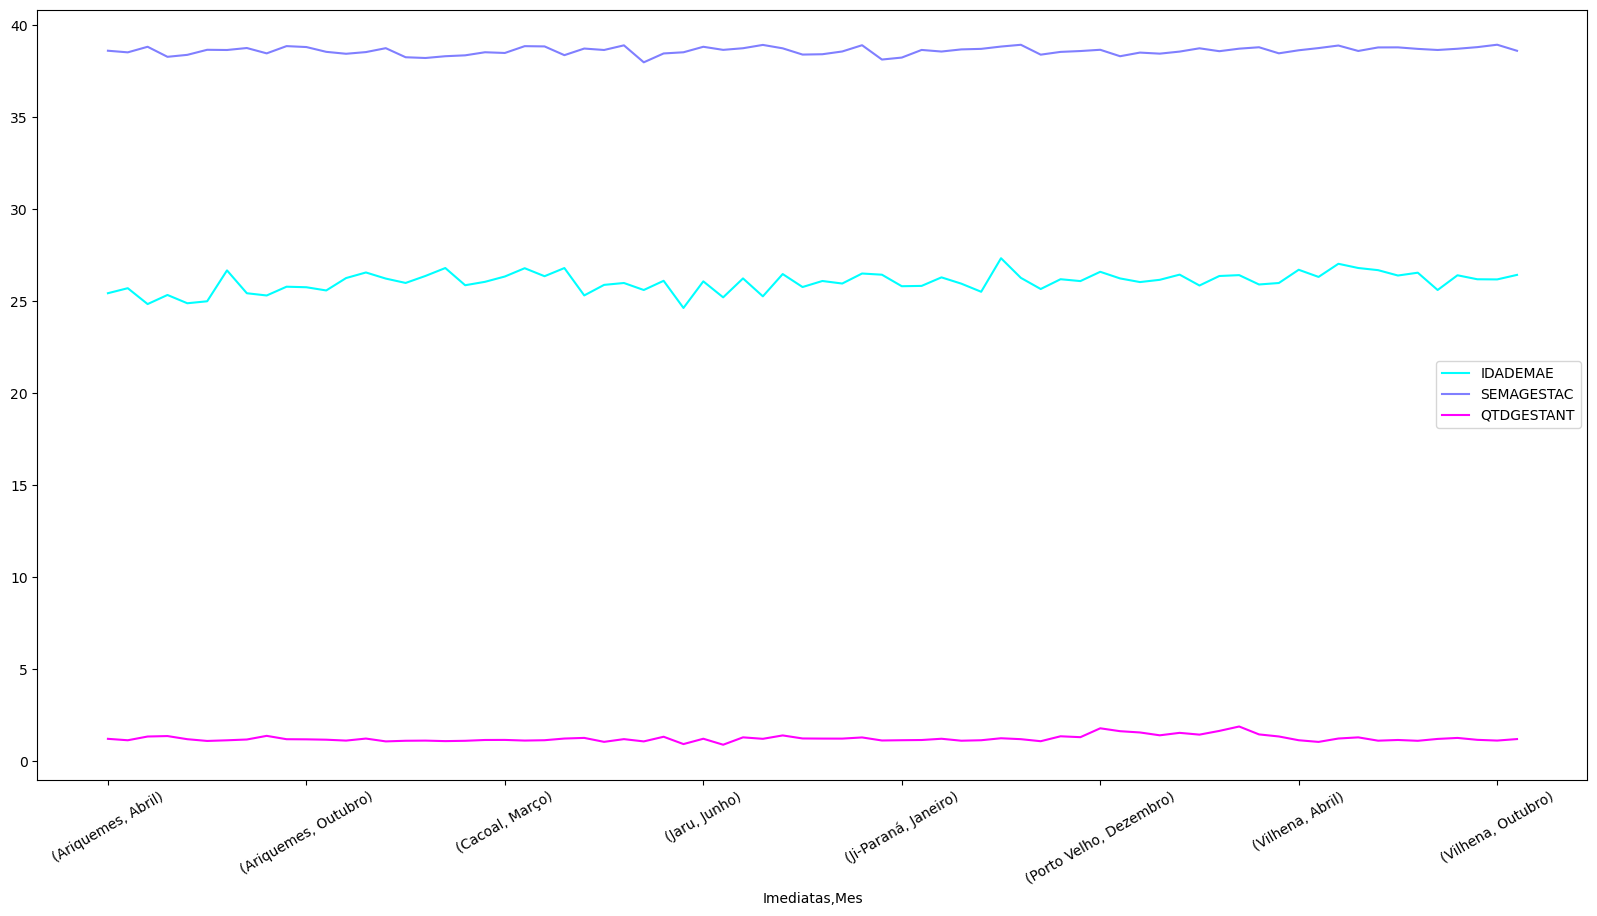

In [23]:
sinasc_select8.plot(figsize = (20,10), cmap='cool')
plt.xticks(rotation=30)

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [24]:
# Craindo o dicionário de IDH

idh = {
    'Porto Velho': 'IDH-M alto',
'Vilhena': 'IDH-M alto',
'Cacoal': 'IDH-M alto',
'Ji-Paraná': 'IDH-M alto',
'Pimenta Bueno': 'IDH-M alto',
'Ariquemes': 'IDH-M alto',
'Rolim de Moura': 'IDH-M alto',
'Cerejeiras': 'IDH-M médio',
'Jaru': 'IDH-M médio',
'Colorado do Oeste': 'IDH-M médio',
'Ouro Preto do Oeste': 'IDH-M médio',
"Espigão D'Oeste": 'IDH-M médio',
"Santa Luzia D'Oeste": 'IDH-M médio',
'Pimenteiras do Oeste': 'IDH-M médio',
'Presidente Médici': 'IDH-M médio',
'Castanheiras': 'IDH-M médio',
'Guajará-Mirim': 'IDH-M médio',
'Chupinguaia': 'IDH-M médio',
'Cabixi': 'IDH-M médio',
'Candeias do Jamari': 'IDH-M médio',
"São Felipe D'Oeste": 'IDH-M médio',
'Cacaulândia': 'IDH-M médio',
'São Miguel do Guaporé': 'IDH-M médio',
'Mirante da Serra': 'IDH-M médio',
"Alvorada D'Oeste": 'IDH-M médio',
'Teixeirópolis': 'IDH-M médio',
"Nova Brasilândia D'Oeste": 'IDH-M médio',
'Rio Crespo': 'IDH-M médio',
'Primavera de Rondônia': 'IDH-M médio',
"Alta Floresta D'Oeste": 'IDH-M médio',
'Ministro Andreazza': 'IDH-M médio',
'Novo Horizonte do Oeste': 'IDH-M médio',
'Vale do Paraíso': 'IDH-M médio',
'Alto Paraíso': 'IDH-M médio',
'Parecis': 'IDH-M médio',
'Buritis': 'IDH-M médio',
'Itapuã do Oeste': 'IDH-M médio',
'Corumbiara': 'IDH-M médio',
'Cujubim': 'IDH-M médio',
'Costa Marques': 'IDH-M médio',
'São Francisco do Guaporé': 'IDH-M médio',
'Urupá': 'IDH-M médio',
'Monte Negro': 'IDH-M médio',
'Seringueiras': 'IDH-M baixo',
'Governador Jorge Teixeira': 'IDH-M baixo',
"Machadinho D'Oeste": 'IDH-M baixo',
'Campo Novo de Rondônia': 'IDH-M baixo',
'Alto Alegre dos Parecis': 'IDH-M baixo',
'Theobroma': 'IDH-M baixo',
'Nova União': 'IDH-M baixo',
'Nova Mamoré': 'IDH-M baixo',
'Vale do Anari': 'IDH-M baixo'

}

In [25]:
sinasc_raw.set_index('munResNome').groupby(idh).count()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
IDH-M alto,16855,16799,16855,16855,16855,16646,16632,15110,15695,15428,...,16855,16855,16855,16855,16855,16855,16855,16855,16855,16855
IDH-M baixo,1826,1813,1826,1826,1826,1802,1807,1505,1734,1684,...,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
IDH-M médio,8346,8300,8346,8346,8346,8262,8276,7505,8025,7817,...,8346,8346,8346,8346,8346,8346,8346,8346,8346,8346


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [26]:
ifdm = {'Ariquemes': 'Desenvolvimento moderado',
'Vilhena': 'Desenvolvimento moderado',
'Pimenta Bueno': 'Desenvolvimento moderado',
'Porto Velho': 'Desenvolvimento moderado',
'Ji-Paraná': 'Desenvolvimento moderado',
'Cacoal': 'Desenvolvimento moderado',
"Santa Luzia D'Oeste": 'Desenvolvimento moderado',
'Rolim de Moura': 'Desenvolvimento moderado',
'Chupinguaia': 'Desenvolvimento moderado',
'São Miguel do Guaporé': 'Desenvolvimento moderado',
'Pimenteiras do Oeste': 'Desenvolvimento moderado',
'Teixeirópolis': 'Desenvolvimento moderado',
'Colorado do Oeste': 'Desenvolvimento moderado',
'Jaru': 'Desenvolvimento moderado',
'Rio Crespo': 'Desenvolvimento moderado',
'Primavera de Rondônia': 'Desenvolvimento moderado',
"Alta Floresta D'Oeste": 'Desenvolvimento moderado',
'Ouro Preto do Oeste': 'Desenvolvimento moderado',
'São Francisco do Guaporé': 'Desenvolvimento moderado',
'Candeias do Jamari': 'Desenvolvimento moderado',
'Buritis': 'Desenvolvimento moderado',
"São Felipe D'Oeste": 'Desenvolvimento moderado',
'Presidente Médici': 'Desenvolvimento moderado',
'Cerejeiras': 'Desenvolvimento moderado',
'Monte Negro': 'Desenvolvimento moderado',
'Urupá': 'Desenvolvimento moderado',
"Espigão D'Oeste": 'Desenvolvimento regular',
'Seringueiras': 'Desenvolvimento regular',
"Alvorada D'Oeste": 'Desenvolvimento regular',
'Itapuã do Oeste': 'Desenvolvimento regular',
'Cabixi': 'Desenvolvimento regular',
'Novo Horizonte do Oeste': 'Desenvolvimento regular',
"Nova Brasilândia D'Oeste": 'Desenvolvimento regular',
'Vale do Paraíso': 'Desenvolvimento regular',
'Corumbiara': 'Desenvolvimento regular',
'Alto Paraíso': 'Desenvolvimento regular',
'Cacaulândia': 'Desenvolvimento regular',
'Vale do Anari': 'Desenvolvimento regular',
'Ministro Andreazza': 'Desenvolvimento regular',
'Costa Marques': 'Desenvolvimento regular',
'Nova União': 'Desenvolvimento regular',
'Guajará-Mirim': 'Desenvolvimento regular',
'Mirante da Serra': 'Desenvolvimento regular',
'Parecis': 'Desenvolvimento regular',
'Castanheiras': 'Desenvolvimento regular',
'Theobroma': 'Desenvolvimento regular',
"Machadinho D'Oeste": 'Desenvolvimento regular',
'Campo Novo de Rondônia': 'Desenvolvimento regular',
'Nova Mamoré': 'Desenvolvimento regular',
'Cujubim': 'Desenvolvimento regular',
'Alto Alegre dos Parecis': 'Desenvolvimento regular',
'Governador Jorge Teixeira': 'Desenvolvimento regular'
}

In [28]:
sinasc_raw.set_index('munResNome').groupby(ifdm).count()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
Desenvolvimento moderado,21946,21870,21946,21946,21946,21690,21673,19638,20514,20057,...,21946,21946,21946,21946,21946,21946,21946,21946,21946,21946
Desenvolvimento regular,5081,5042,5081,5081,5081,5020,5042,4482,4940,4872,...,5081,5081,5081,5081,5081,5081,5081,5081,5081,5081


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [30]:
pib = {'Porto Velho': 'Acima de 1 Bilhão',
'Ji-Paraná': 'Acima de 1 Bilhão',
'Vilhena': 'Acima de 1 Bilhão',
'Ariquemes': 'Acima de 1 Bilhão',
'Cacoal': 'Acima de 1 Bilhão',
'Jaru': 'Acima de 1 Bilhão',
'Rolim de Moura': 'Acima de 1 Bilhão',
'Pimenta Bueno': 'Acima de 1 Bilhão',
'Guajará-Mirim': 'Acima de 500 Milhões',
'Ouro Preto do Oeste': 'Acima de 500 Milhões',
'Buritis': 'Acima de 500 Milhões',
"Machadinho D'Oeste": 'Acima de 500 Milhões',
"Espigão D'Oeste": 'Acima de 500 Milhões',
'São Miguel do Guaporé': 'Acima de 500 Milhões',
'Candeias do Jamari': 'Acima de 500 Milhões',
'Nova Mamoré': 'Acima de 500 Milhões',
'Cerejeiras': 'Acima de 500 Milhões',
"Alta Floresta D'Oeste": 'Acima de 300 Milhões',
'Presidente Médici': 'Acima de 300 Milhões',
'Cujubim': 'Acima de 300 Milhões',
"Nova Brasilândia D'Oeste": 'Acima de 300 Milhões',
'Alto Paraíso': 'Acima de 300 Milhões',
'São Francisco do Guaporé': 'Acima de 300 Milhões',
"Colorado do Oeste": 'Acima de 300 Milhões',
'Monte Negro': 'Acima de 200 Milhões',
'Alto Alegre dos Parecis': 'Acima de 200 Milhões',
'Campo Novo de Rondônia': 'Acima de 200 Milhões',
"Alvorada D'Oeste": 'Acima de 200 Milhões',
'Chupinguaia': 'Acima de 100 Milhões',
'Corumbiara': 'Acima de 100 Milhões',
'Ministro Andreazza': 'Acima de 100 Milhões',
'Urupá': 'Acima de 100 Milhões',
'Costa Marques': 'Acima de 100 Milhões',
'Seringueiras': 'Acima de 100 Milhões',
'Mirante da Serra': 'Acima de 100 Milhões',
'Governador Jorge Teixeira': 'Acima de 100 Milhões',
'Theobroma': 'Acima de 100 Milhões',
"Santa Luzia D'Oeste": 'Acima de 100 Milhões',
'Novo Horizonte do Oeste': 'Acima de 100 Milhões',
'Itapuã do Oeste': 'Acima de 100 Milhões',
'Vale do Paraíso': 'Acima de 100 Milhões',
'Cacaulândia': 'Acima de 100 Milhões',
'Cabixi': 'Acima de 100 Milhões',
'Vale do Anari': 'Acima de 100 Milhões',
'Nova União': 'Até 100 Milhões',
'Parecis': 'Até 100 Milhões',
'Rio Crespo': 'Até 100 Milhões',
'Pimenteiras do Oeste': 'Até 100 Milhões',
'Teixeirópolis': 'Até 100 Milhões',
"São Felipe D'Oeste": 'Até 100 Milhões',
'Castanheiras': 'Até 100 Milhões',
'Primavera de Rondônia': 'Até 100 Milhões'

}

In [31]:
sinasc_raw.set_index('munResNome').groupby(pib).count()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
Acima de 1 Bilhão,17736,17678,17736,17736,17736,17520,17508,15942,16569,16301,...,17736,17736,17736,17736,17736,17736,17736,17736,17736,17736
Acima de 100 Milhões,1952,1943,1952,1952,1952,1926,1934,1738,1922,1916,...,1952,1952,1952,1952,1952,1952,1952,1952,1952,1952
Acima de 200 Milhões,724,722,724,724,724,708,705,686,677,649,...,724,724,724,724,724,724,724,724,724,724
Acima de 300 Milhões,1880,1874,1880,1880,1880,1858,1862,1723,1860,1852,...,1880,1880,1880,1880,1880,1880,1880,1880,1880,1880
Acima de 500 Milhões,4304,4265,4304,4304,4304,4272,4277,3690,4001,3787,...,4304,4304,4304,4304,4304,4304,4304,4304,4304,4304
Até 100 Milhões,431,430,431,431,431,426,429,341,425,424,...,431,431,431,431,431,431,431,431,431,431


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

* A Latitude, como agrupada, não tem influência sobre o número de consultas ou tempo de gestação das mulheres
* As médias da idade da mãe, quantidades de gestações e e tempo de gestação das mães parece aproximadamente constante independente das regiões imediatas através do tempo
* Há uma, aproximada, relação direta entre o número de partos registrados e o IDH das cidades estudadas. 